# Automatic Differentiation with ```torch.autograd```


When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:


https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html


In [1]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# Tensors, Functions and Computational graph
This code defines the following computational graph:

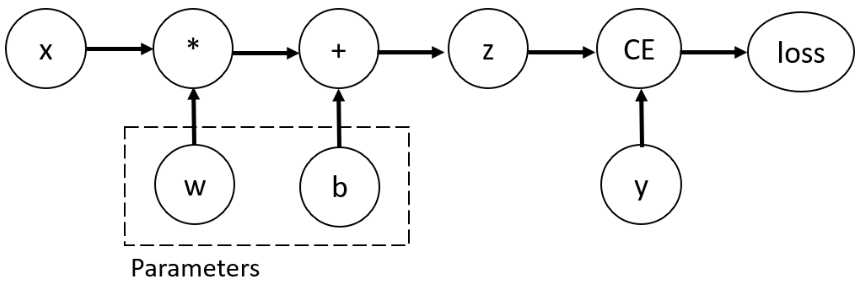

In this network, w and b are **parameters**, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the ```requires_grad``` property of those tensors.

💡Note

You can set the value of requires_grad when creating a tensor, or later by using x.requires_grad_(True) method.

A function that we apply to tensors to construct computational graph is in fact an object of class ```Function```. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in ```grad_fn``` property of a tensor. You can find more information of ```Function``` in the documentation.

In [2]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000001332397C6A0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000001332397C820>


Computing Gradients
To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need 
```∂loss/∂w``` and ```∂w/∂loss``` under some fixed values of ````x``` and ```y```. To compute those derivatives, we call ```loss.backward()```, and then retrieve the values from ```w.grad``` and ```b.grad```:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0333, 0.0272, 0.2533],
        [0.0333, 0.0272, 0.2533],
        [0.0333, 0.0272, 0.2533],
        [0.0333, 0.0272, 0.2533],
        [0.0333, 0.0272, 0.2533]])
tensor([0.0333, 0.0272, 0.2533])


💡Note

* We can only obtain the ```grad``` properties for the leaf nodes of the computational graph, which have ```requires_grad``` property set to ```True```. For all other nodes in our graph, gradients will not be available.

* We can only perform gradient calculations using ```backward``` once on a given graph, for performance reasons. If we need to do several ```backward``` calls on the same graph, we need to pass ```retain_graph=True``` to the ```backward``` call.

# Disabling Gradient Tracking
By default, all tensors with ```requires_grad=True``` are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do ```forward``` computations through the network. We can stop tracking computations by surrounding our computation code with ```torch.no_grad()``` block:

In [4]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Another way to achieve the same result is to use the ```detach()``` method on the tensor:



In [5]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


# There are reasons you might want to disable gradient tracking:

* To mark some parameters in your neural network as **frozen parameters**.

* To **speed up computations** when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.